In [67]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Polygon
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [19]:
# Load data into DFs
passing = pd.read_csv("pass.csv")
rush = pd.read_csv("rush.csv")
rec = pd.read_csv("rec.csv")

# Add Week Column

In [20]:
# Initialize Week Column
passing['Week'] = 0
rush["Week"] = 0
rec['Week'] = 0

# Convert Date to datetime
passing['Date'] = pd.to_datetime(passing['Date'])
rush['Date'] = pd.to_datetime(rush['Date'])
rec['Date'] = pd.to_datetime(rec['Date'])

# Initialize dictionary of dates
week_dates = {1:['2021-09-09', '2021-09-13'], 2: ['2021-09-16', '2021-09-20'],
              3:['2021-09-23', '2021-09-27'], 4: ['2021-09-30', '2021-10-04'],
              5:['2021-10-07', '2021-10-11'], 6: ['2021-10-14', '2021-10-18'],
              7:['2021-10-21', '2021-10-25'], 8: ['2021-10-28', '2021-11-01'],
              9:['2021-11-04', '2021-11-08'], 10: ['2021-11-11', '2021-11-15'],
              11:['2021-11-18', '2021-11-22'], 12: ['2021-11-25', '2021-11-29'],
              13:['2021-12-02', '2021-12-06'], 14: ['2021-12-09', '2021-12-13'],
              15:['2021-12-16', '2021-12-21'], 16: ['2021-12-23', '2021-12-27'],
              17:['2022-01-02', '2022-01-03'], 18: ['2022-01-08', '2022-01-09']}

# Use dictionary for week numbers
for i, j in zip(week_dates.keys(), week_dates.values()):
    passing['Week'] = np.where((passing['Date'] >= j[0]) & (passing['Date'] <= j[1]) , i, passing['Week'])
    rush['Week'] = np.where((rush['Date'] >= j[0]) & (rush['Date'] <= j[1]) , i, rush['Week'])
    rec['Week'] = np.where((rec['Date'] >= j[0]) & (rec['Date'] <= j[1]) , i, rec['Week'])

# Add Home/Away

In [21]:
# Add 0 for home game and 1 for away game
passing.rename(columns={'Unnamed: 7':'Location'}, inplace=True)
rush.rename(columns={'Unnamed: 6':'Location'}, inplace=True)
rec.rename(columns={'Unnamed: 7':'Location'}, inplace=True)

passing['Location'] = passing['Location'].fillna(0)
rush['Location'] = rush['Location'].fillna(0)
rec['Location'] = rec['Location'].fillna(0)

passing['Location'] = np.where(passing['Location'] == '@', 1, passing['Location'])
rush['Location'] = np.where(rush['Location'] == '@', 1, rush['Location'])
rec['Location'] = np.where(rec['Location'] == '@', 1, rec['Location'])

# Add Fantasy Points

In [22]:
# Add score based off of fantasy scoring
passing['Pass_PTS'] = (passing['TD'].astype(int) * 4) + (passing['Yds'].astype(int) / 25) + (passing['Int'].astype(int) * -2)
rush['Rush_PTS'] = (rush['TD'].astype(int) * 6) + (rush['Yds'].astype(int) / 10)
rec['Rec_PTS'] = (rec['TD'].astype(int) * 6) + (rec['Yds'].astype(int) / 10) + (rec['Rec'] *.5)

# Combine into single DF
Weekly_df = passing[['Player-additional', 'Player', 'Pos.', 'Team', 'Week', 'Pass_PTS']]
temp1 = rush[['Player-additional', 'Player', 'Pos.', 'Team', 'Week', 'Rush_PTS']]
temp2 = rec[['Player-additional', 'Player', 'Pos.', 'Team', 'Week', 'Rec_PTS']]
Weekly_df = Weekly_df.merge(temp1, on=['Player-additional', 'Week', 'Player', 'Pos.', 'Team'], how='outer')
Weekly_df = Weekly_df.merge(temp2, on=['Player-additional', 'Week', 'Player', 'Pos.', 'Team'], how='outer')

Weekly_df = Weekly_df.fillna(0)
Weekly_df['PTS'] = Weekly_df['Pass_PTS'] + Weekly_df['Rush_PTS']  + Weekly_df['Rec_PTS']

Weekly_df.sort_values(by=['PTS'], ascending = False)

,Player-additional,Player,Pos.,Team,Week,Pass_PTS,Rush_PTS,Rec_PTS,PTS
678,TaylJo02,Jonathan Taylor,RB,IND,11,0.00,42.5,9.4,51.90
2419,ChasJa00,Ja'Marr Chase,WR,CIN,17,0.00,0.0,50.1,50.10
675,HenrDe00,Derrick Henry,RB,TEN,2,0.00,36.2,8.5,44.70
2421,HillTy00,Tyreek Hill,WR,KAN,4,0.00,0.0,42.1,42.10
16,HerbJu00,Justin Herbert,QB,LAC,5,31.92,8.9,0.0,40.82
...,...,...,...,...,...,...,...,...,...
629,RoseJo01,Josh Rosen,QB,ATL,11,-1.80,0.0,0.0,-1.80
651,FranFe00,Feleipe Franks,QB,ATL,11,-2.00,0.0,0.0,-2.00
533,GlenMi00,Mike Glennon,QB,NYG,15,-2.04,0.0,0.0,-2.04
673,WolfJo00,John Wolford,QB,LAR,6,-2.00,-0.1,0.0,-2.10


# Create Season DF

In [30]:
# Merge based on week
for i in range(1,19): 
    if i == 1:
        temp = Weekly_df[Weekly_df['Week'] == i]
        Season_df = temp[['Player-additional', 'Player', 'Pos.', 'Team', 'PTS']]
        Season_df.columns = ['Player-additional', 'Player', 'Pos.', 'Team', 'Week1']
    else:
        temp = Weekly_df[Weekly_df['Week'] == i]
        temp = temp[['Player-additional', 'Player', 'Pos.', 'Team', 'PTS']]
        temp.columns = ['Player-additional', 'Player', 'Pos.', 'Team', 'Week{}'.format(i)]
        Season_df = Season_df.merge(temp, on=['Player-additional', 'Player', 'Pos.', 'Team'], how='outer')

# Fill missing weeks with -99.
#Season_df = Season_df.fillna(-99.)

# Clean Data
Season_df['Pos.'] = np.where(Season_df['Pos.'] == 0, 'WR', Season_df['Pos.'])

# Add total, gp, and avg cols
weeks = ['Week{}'.format(i) for i in range(1,19)]
total = []
gp = []
avg = []

for index, row in Season_df.iterrows():
    value = [i for i in row[weeks].values if np.isnan(i) == False]
    total.append(sum(value))
    gp.append(len(value))
    
Season_df['Total'] = total
Season_df['GP'] = gp
Season_df['Avg'] = Season_df.Total.div(Season_df.GP)
Season_df.loc[~np.isfinite(Season_df['Avg']), 'Avg'] = 0 

# Add Position Rank Column
Season_df['Pos_Rank'] = np.nan
for i in set(Season_df['Pos.']):
    temp = Season_df[Season_df['Pos.'] == i]
    temp = temp.sort_values(by=['Total'], ascending = False)
    counter = 0
    for index, row in temp.iterrows():
        counter += 1
        current_player = row['Player-additional']
        Season_df['Pos_Rank'] = np.where(Season_df['Player-additional'] == current_player , counter, Season_df['Pos_Rank'])
Season_df.head()

,Player-additional,Player,Pos.,Team,Week1,Week2,Week3,Week4,Week5,Week6,Week7,Week8,Week9,Week10,Week11,Week12,Week13,Week14,Week15,Week16,Week17,Week18,Total,GP,Avg,Pos_Rank
0,CarrDe02,Derek Carr,QB,LVR,24.00,24.18,21.24,14.44,7.24,21.54,19.02,NaN,12.34,18.24,10.60,21.02,12.36,12.52,12.14,10.54,10.20,15.34,266.96,17,15.703529,13.0
1,PresDa01,Dak Prescott,QB,DAL,27.42,7.48,22.12,27.02,22.68,28.80,NaN,NaN,16.88,26.34,4.64,23.30,11.22,9.94,12.58,31.30,23.04,31.80,326.56,16,20.410000,7.0
2,BradTo00,Tom Brady,QB,TAM,27.16,31.64,28.68,11.06,37.74,17.98,24.44,27.20,NaN,13.00,19.28,11.24,28.62,30.12,6.76,14.38,26.40,25.04,380.74,17,22.396471,2.0
3,CousKi00,Kirk Cousins,QB,MIN,22.04,25.26,25.12,10.12,13.40,28.52,NaN,13.16,21.58,19.46,25.24,15.52,22.20,14.04,10.48,16.30,NaN,21.90,304.34,16,19.021250,10.0
4,GoffJa00,Jared Goff,QB,DET,24.92,20.44,9.08,20.76,6.12,6.18,11.02,8.88,NaN,4.56,NaN,14.84,21.94,11.60,20.64,NaN,NaN,17.52,198.50,14,14.178571,24.0


# Add VOR

In [31]:
VOR_dict = {'QB':10, 'RB':20, 'WR': 30, 'TE': 10}

Season_df['VOR_Total'] = np.nan
Season_df['VOR_Avg'] = np.nan
for i in VOR_dict.keys():
    result = Season_df[(Season_df['Pos.'] == i) & (Season_df['Pos_Rank'] == VOR_dict[i])]
    value = result['Total'].iloc[0]
    avg_value = result['Avg']
    temp = Season_df[Season_df['Pos.'] == i]
    for index, row in temp.iterrows():
        VOR_Total = row['Total'] - value
        VOR_Avg = row['Avg'] - avg_value
        Season_df.at[index, 'VOR_Total'] = VOR_Total
        Season_df.at[index, 'VOR_Avg'] = VOR_Avg

#best_players = Season_df.sort_values(by = ['VOR_Total'], ascending = False)
#pd.set_option('display.max_rows', None)
#print(best_players[['Player', 'Pos.', 'VOR_Total']])

In [8]:
#best_average = Season_df.sort_values(by = ['VOR_Avg'], ascending = False)
#pd.set_option('display.max_rows', None)
#print(best_average[['Player', 'Pos.', 'VOR_Avg']])

In [9]:
#adding_value = best_players[best_players['VOR_Total'] > 25]
#bad_teams = list(set(Season_df['Team'])-set(adding_value['Team']))
#print(bad_teams)
#adding_value.groupby(['Team']).size().sort_values(ascending=False)

# Look at DF

In [32]:
Season_df

,Player-additional,Player,Pos.,Team,Week1,Week2,Week3,Week4,Week5,Week6,Week7,Week8,Week9,Week10,Week11,Week12,Week13,Week14,Week15,Week16,Week17,Week18,Total,GP,Avg,Pos_Rank,VOR_Total,VOR_Avg
0,CarrDe02,Derek Carr,QB,LVR,24.00,24.18,21.24,14.44,7.24,21.54,19.02,NaN,12.34,18.24,10.60,21.02,12.36,12.52,12.14,10.54,10.20,15.34,266.96,17,15.703529,13.0,-37.38,-3.317721
1,PresDa01,Dak Prescott,QB,DAL,27.42,7.48,22.12,27.02,22.68,28.80,NaN,NaN,16.88,26.34,4.64,23.30,11.22,9.94,12.58,31.30,23.04,31.80,326.56,16,20.410000,7.0,22.22,1.388750
2,BradTo00,Tom Brady,QB,TAM,27.16,31.64,28.68,11.06,37.74,17.98,24.44,27.20,NaN,13.00,19.28,11.24,28.62,30.12,6.76,14.38,26.40,25.04,380.74,17,22.396471,2.0,76.40,3.375221
3,CousKi00,Kirk Cousins,QB,MIN,22.04,25.26,25.12,10.12,13.40,28.52,NaN,13.16,21.58,19.46,25.24,15.52,22.20,14.04,10.48,16.30,NaN,21.90,304.34,16,19.021250,10.0,0.00,0.000000
4,GoffJa00,Jared Goff,QB,DET,24.92,20.44,9.08,20.76,6.12,6.18,11.02,8.88,NaN,4.56,NaN,14.84,21.94,11.60,20.64,NaN,NaN,17.52,198.50,14,14.178571,24.0,-105.84,-4.842679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,WilcMi01,Mitchell Wilcox,WR,CIN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.10,3.10,1,3.100000,215.0,-150.50,-5.935294
665,RodgRi00,Richard Rodgers,TE,PHI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.10,2.10,1,2.100000,100.0,-124.40,-5.341176
666,SaunCJ00,C.J. Saunders,WR,CAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.10,2.10,1,2.100000,222.0,-151.50,-6.935294
667,TaylTr02,Trent Taylor,WR,CIN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.10,5.10,1,5.100000,197.0,-148.50,-3.935294


# Weekly Ranking DF

In [81]:
#Week_Rank_df = pd.DataFrame(columns = ['Player-additional', 'Player', 'Pos.', 'Team'])
#counter = 0
initial_cols = ['Player-additional', 'Player', 'Pos.', 'Team']
week_cols = ['Week{} Rank'.format(i) for i in range(1,19)]
all_cols = initial_cols + week_cols
ALL = pd.DataFrame(columns = all_cols)
for pos in ['QB', 'RB', 'WR', 'TE']:
    position_df = Season_df[Season_df['Pos.'] == pos]
    Week_Rank_df = pd.DataFrame(columns = ['Player-additional', 'Player', 'Pos.', 'Team'])
    for week in ['Week{}'.format(i) for i in range(1, 19)]:
        counter += 1
        current_week = position_df[['Player-additional', 'Player', 'Pos.', 'Team', week]]
        current_week = current_week.dropna()
        current_week = current_week.sort_values(by=[week], ascending = False)
        Rank = [i for i in range(1, current_week.shape[0] + 1)]
        current_week[week + ' Rank'] = Rank
        current_week = current_week.drop([week], axis = 1)
        Week_Rank_df = Week_Rank_df.merge(current_week, on=['Player-additional', 'Player', 'Pos.', 'Team'], how='outer')
    temp = Week_Rank_df[week_cols]
    Week_Rank_df['Median_Rank']=temp.median(axis = 1)
    Week_Rank_df['Mean_Rank']=temp.mean(axis = 1)
    Week_Rank_df['Top_3'] = temp.apply(lambda x: (x<=3).sum(), axis = 1)
    Week_Rank_df['Top_5'] = temp.apply(lambda x: (x<=5).sum(), axis = 1)
    Week_Rank_df['Top_10'] = temp.apply(lambda x: (x<=10).sum(), axis = 1)
    Week_Rank_df['Top_15'] = temp.apply(lambda x: (x<=15).sum(), axis = 1)
    Week_Rank_df['Top_20'] = temp.apply(lambda x: (x<=20).sum(), axis = 1)
    Week_Rank_df['Top_30'] = temp.apply(lambda x: (x<=30).sum(), axis = 1)
    ALL = pd.concat([ALL, Week_Rank_df], ignore_index = True)
    
    
ALL

,Player-additional,Player,Pos.,Team,Week1 Rank,Week2 Rank,Week3 Rank,Week4 Rank,Week5 Rank,Week6 Rank,Week7 Rank,Week8 Rank,Week9 Rank,Week10 Rank,Week11 Rank,Week12 Rank,Week13 Rank,Week14 Rank,Week15 Rank,Week16 Rank,Week17 Rank,Week18 Rank,Median_Rank,Mean_Rank,Top_3,Top_5,Top_10,Top_15,Top_20,Top_30
0,MurrKy00,Kyler Murray,QB,ARI,1.0,1.0,14.0,9.0,22.0,4.0,11.0,29.0,NaN,NaN,NaN,NaN,1.0,16.0,19.0,6.0,5.0,14.0,10.0,10.857143,3.0,5.0,7.0,10.0,12.0,14.0
1,MahoPa00,Patrick Mahomes,QB,KAN,2.0,8.0,7.0,1.0,12.0,8.0,21.0,16.0,22.0,1.0,22.0,NaN,18.0,11.0,3.0,5.0,7.0,7.0,8.0,10.058824,4.0,5.0,10.0,12.0,14.0,17.0
2,WinsJa00,Jameis Winston,QB,NOR,3.0,27.0,23.0,26.0,5.0,NaN,16.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,18.000000,1.0,2.0,2.0,2.0,3.0,7.0
3,HurtJa00,Jalen Hurts,QB,PHI,4.0,10.0,12.0,4.0,13.0,7.0,6.0,24.0,13.0,7.0,3.0,29.0,NaN,NaN,2.0,11.0,19.0,NaN,10.0,10.933333,2.0,4.0,8.0,12.0,13.0,15.0
4,PresDa01,Dak Prescott,QB,DAL,5.0,28.0,8.0,6.0,8.0,1.0,NaN,NaN,11.0,2.0,29.0,3.0,22.0,26.0,18.0,2.0,4.0,1.0,7.0,10.875000,5.0,7.0,10.0,11.0,12.0,16.0
5,BradTo00,Tom Brady,QB,TAM,6.0,3.0,4.0,28.0,3.0,13.0,5.0,2.0,NaN,14.0,11.0,20.0,2.0,2.0,29.0,18.0,3.0,6.0,6.0,9.941176,6.0,8.0,10.0,13.0,15.0,17.0
6,WilsRu00,Russell Wilson,QB,SEA,7.0,9.0,21.0,10.0,27.0,NaN,NaN,NaN,NaN,26.0,25.0,9.0,14.0,14.0,32.0,12.0,2.0,3.0,13.0,15.071429,2.0,2.0,6.0,9.0,9.0,13.0
7,GoffJa00,Jared Goff,QB,DET,8.0,12.0,30.0,13.0,31.0,27.0,20.0,30.0,NaN,30.0,NaN,17.0,6.0,24.0,8.0,NaN,NaN,12.0,18.5,19.142857,0.0,0.0,3.0,6.0,8.0,13.0
8,StafMa00,Matthew Stafford,QB,LAR,9.0,17.0,2.0,16.0,18.0,5.0,3.0,5.0,17.0,19.0,NaN,5.0,3.0,6.0,11.0,31.0,13.0,13.0,11.0,11.352941,3.0,6.0,8.0,11.0,16.0,16.0
9,CarrDe02,Derek Carr,QB,LVR,10.0,7.0,10.0,25.0,30.0,10.0,14.0,NaN,18.0,9.0,19.0,7.0,19.0,22.0,20.0,21.0,24.0,16.0,18.0,16.529412,0.0,0.0,6.0,7.0,12.0,17.0


In [82]:
def find_best_VOR(pos = None, avg = False):
    
    if pos is None:
        temp = Season_df.sort_values(by = 'VOR_Total', ascending = False)
    elif not avg:
        temp = Season_df[Season_df['Pos.'] == pos].sort_values(by = 'VOR_Total', ascending = False)
    else:
        temp = Season_df[Season_df['Pos.'] == pos].sort_values(by = 'VOR_Avg', ascending = False)
    return temp
    
find_best_VOR(pos = 'RB', avg = True)

,Player-additional,Player,Pos.,Team,Week1,Week2,Week3,Week4,Week5,Week6,Week7,Week8,Week9,Week10,Week11,Week12,Week13,Week14,Week15,Week16,Week17,Week18,Total,GP,Avg,Pos_Rank,VOR_Total,VOR_Avg
47,HenrDe00,Derrick Henry,RB,TEN,9.2,44.7,15.9,24.7,31.0,34.6,15.4,6.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,182.30,8,22.787500,18.0,4.50,12.328676
48,TaylJo02,Jonathan Taylor,RB,IND,14.6,5.8,7.7,18.9,30.4,28.3,18.5,19.7,33.0,21.60,51.9,17.7,26.3,NaN,23.0,10.8,17.9,11.0,357.10,17,21.005882,1.0,179.30,10.547059
56,EkelAu00,Austin Ekeler,RB,LAC,11.7,16.0,19.7,28.0,32.4,7.5,NaN,21.4,9.7,13.40,38.5,18.9,18.9,15.4,16.2,NaN,18.7,24.4,310.80,16,19.425000,2.0,133.00,8.966176
39,MixoJo00,Joe Mixon,RB,CIN,23.0,7.6,9.9,13.2,10.0,23.8,11.9,23.1,25.5,NaN,24.3,30.3,11.4,7.8,6.5,28.5,12.1,NaN,268.90,16,16.806250,3.0,91.10,6.347426
45,KamaAl00,Alvin Kamara,RB,NOR,16.6,5.0,19.3,12.0,26.7,NaN,28.9,15.1,18.4,NaN,NaN,NaN,NaN,22.5,4.1,6.9,18.5,17.2,211.20,13,16.246154,9.0,33.40,5.787330
50,ConnJa00,James Conner,RB,ARI,5.3,2.6,17.8,19.6,10.2,7.6,12.4,14.2,37.8,13.90,18.4,NaN,18.1,29.0,8.0,NaN,NaN,24.3,239.20,15,15.946667,5.0,61.40,5.487843
70,FourLe00,Leonard Fournette,RB,TAM,8.4,9.6,4.9,15.4,19.0,27.7,16.0,5.8,NaN,13.20,10.4,40.6,18.7,21.2,10.2,NaN,NaN,NaN,221.10,14,15.792857,7.0,43.30,5.334034
42,McCaCh01,Christian McCaffrey,RB,CAR,23.2,22.2,5.0,NaN,NaN,NaN,NaN,NaN,12.6,21.10,21.4,3.5,NaN,NaN,NaN,NaN,NaN,NaN,109.00,7,15.571429,41.0,-68.80,5.112605
51,HarrNa00,Najee Harris,RB,PIT,5.4,16.6,21.2,18.1,21.2,21.7,NaN,19.5,15.3,15.30,14.4,5.2,13.2,23.9,3.6,13.5,28.1,7.5,263.70,17,15.511765,4.0,85.90,5.052941
54,ChubNi00,Nick Chubb,RB,CLE,23.1,16.3,8.4,11.0,23.5,NaN,NaN,7.4,29.3,NaN,21.4,4.9,NaN,8.0,15.8,25.9,5.8,6.5,207.30,14,14.807143,11.0,29.50,4.348319


In [87]:
def find_player_weekly_position(player):
    
    temp1 = ALL[ALL['Player'] == player]
    temp2 = Season_df[Season_df['Player'] == player]
    return temp1, temp2

find_player_weekly_position('Leonard Fournette')[0]

,Player-additional,Player,Pos.,Team,Week1 Rank,Week2 Rank,Week3 Rank,Week4 Rank,Week5 Rank,Week6 Rank,Week7 Rank,Week8 Rank,Week9 Rank,Week10 Rank,Week11 Rank,Week12 Rank,Week13 Rank,Week14 Rank,Week15 Rank,Week16 Rank,Week17 Rank,Week18 Rank,Median_Rank,Mean_Rank,Top_3,Top_5,Top_10,Top_15,Top_20,Top_30
119,FourLe00,Leonard Fournette,RB,TAM,35.0,23.0,43.0,15.0,15.0,3.0,8.0,43.0,NaN,18.0,17.0,1.0,9.0,7.0,21.0,NaN,NaN,NaN,16.0,18.428571,2.0,2.0,5.0,7.0,9.0,11.0


In [88]:
find_player_weekly_position('Leonard Fournette')[1]

,Player-additional,Player,Pos.,Team,Week1,Week2,Week3,Week4,Week5,Week6,Week7,Week8,Week9,Week10,Week11,Week12,Week13,Week14,Week15,Week16,Week17,Week18,Total,GP,Avg,Pos_Rank,VOR_Total,VOR_Avg
70,FourLe00,Leonard Fournette,RB,TAM,8.4,9.6,4.9,15.4,19.0,27.7,16.0,5.8,NaN,13.2,10.4,40.6,18.7,21.2,10.2,NaN,NaN,NaN,221.1,14,15.792857,7.0,43.3,5.334034


# Add BYE Weeks

In [13]:
bye_weeks = {'Week6': ['ATL', 'NOR', 'NYJ', 'SFO'],
             'Week7': ['BUF', 'DAL', 'JAX', 'LAC', 'MIN', 'PIT'],
             'Week8': ['BAL', 'LVR'],
             'Week9': ['DET', 'SEA', 'TAM', 'WAS'],
             'Week10': ['CHI', 'CIN', 'HOU', 'NYG'],
             'Week11': ['DEN', 'LAR'],
             'Week12': ['ARI', 'KAN'],
             'Week13': ['CAR', 'CLE', 'GNB', 'TEN'],
             'Week14': ['IND', 'MIA', 'NWE', 'PHI']}

In [14]:
"""
for i in bye_weeks.keys():
    for j in bye_weeks[i]:
        Season_df[i] = np.where(Season_df['Team'] == j, 'BYE', Season_df[i])
Season_df.head()
"""

"\nfor i in bye_weeks.keys():\n    for j in bye_weeks[i]:\n        Season_df[i] = np.where(Season_df['Team'] == j, 'BYE', Season_df[i])\nSeason_df.head()\n"

# Plot

In [36]:
def get_single_player(player_name, drop_missing = True):
    
    Week_names = ['Week{}'.format(i) for i in range(1,18)]
    player_df = Season_df[Season_df['Player'] == player_name]
    position = player_df['Pos.']
    team = player_df['Team']
    player_df = player_df[Week_names].T
    player_df.columns = [player_name]
    if drop_missing:
        player_df = player_df[player_df[player_name] != -1]
    med = player_df[player_name].median()
    
    return player_df, med

def boxplot_players(players):
    
    all_df = []
    all_med = []
    games_played = []
    
    fig, ax1 = plt.subplots(figsize=(10, 6))
    
    for i in players:
        player_data = get_single_player(i)
        all_df.append(player_data[0])
        all_med.append(round(player_data[1], 2))
        games_played.append(player_data[0].shape[0])

    all_df = pd.concat(all_df)
    bp = sns.boxplot(data=all_df, color = 'skyblue')
    bp.set_xticklabels(bp.get_xticklabels(),rotation=90)
    
    up_offset = [i * .05 for i in all_med]
    down_offset = [i * .15 for i in all_med]
    
    for xtick in bp.get_xticks():
        bp.text(xtick,all_med[xtick] + up_offset[xtick],all_med[xtick], 
                horizontalalignment='center',size='x-large',color='black',weight='semibold')
        bp.text(xtick,all_med[xtick] - down_offset[xtick],games_played[xtick], 
                horizontalalignment='center',size='x-large',color='black',weight='semibold')
        
    


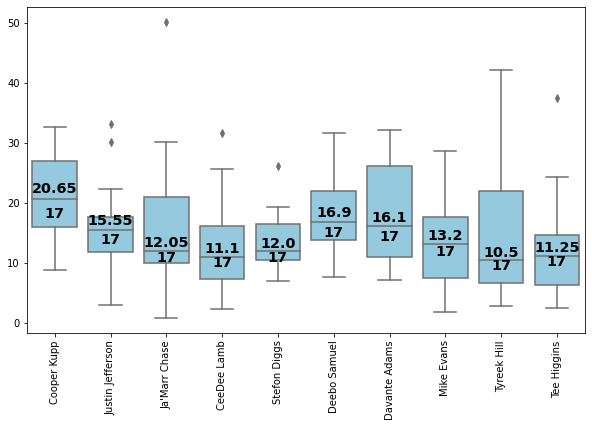

In [37]:
top_qb = ['Josh Allen','Patrick Mahomes', 'Justin Herbert', 'Lamar Jackson', 'Kyler Murray',
       'Joe Burrow', 'Dak Prescott', 'Jalen Hurts', 'Tom Brady', 'Russell Wilson']
top_rb = ['Jonathan Taylor', 'Christian McCaffrey', 'Derrick Henry', 'Austin Ekeler', 'Dalvin Cook',
         'Joe Mixon', 'Najee Harris', 'Nick Chubb']
top_wr = ['Cooper Kupp', 'Justin Jefferson', "Ja'Marr Chase", 'CeeDee Lamb', 'Stefon Diggs', 'Deebo Samuel',
          'Davante Adams', 'Mike Evans', 'Tyreek Hill', 'Tee Higgins']


#boxplot_players(top_qb)
#boxplot_players(top_rb)
boxplot_players(top_wr)

In [17]:
Season_df[Season_df['Team'] == 'CIN']

,Player-additional,Player,Pos.,Team,Week1,Week2,Week3,Week4,Week5,Week6,Week7,Week8,Week9,Week10,Week11,Week12,Week13,Week14,Week15,Week16,Week17,Week18,Total,GP,Avg,Pos_Rank,VOR_Total,VOR_Avg
19,BurrJo01,Joe Burrow,QB,CIN,18.64,10.28,17.58,22.32,16.34,22.84,26.64,20.26,7.38,-99.0,11.02,16.4,18.6,22.22,12.78,38.1,34.84,-99.00,316.24,16,19.765000,8.0,11.90,0.743750
39,MixoJo00,Joe Mixon,RB,CIN,23.00,7.60,9.90,13.20,10.00,23.80,11.90,23.10,25.50,-99.0,24.30,30.3,11.4,7.80,6.50,28.5,12.10,-99.00,268.90,16,16.806250,3.0,91.10,6.347426
86,PeriSa00,Samaje Perine,RB,CIN,3.40,0.00,1.20,2.70,16.30,-99.00,14.00,2.60,4.70,-99.0,3.60,2.0,5.1,5.30,5.30,1.6,1.90,-99.00,69.70,15,4.646667,60.0,-108.10,-5.812157
113,ChasJa00,Ja'Marr Chase,WR,CIN,18.40,12.40,20.50,10.70,24.90,11.70,30.10,11.60,7.90,-99.0,11.50,5.4,7.7,22.80,0.80,16.0,50.10,3.60,266.10,17,15.652941,5.0,112.50,6.617647
185,HiggTe00,Tee Higgins,WR,CIN,13.80,15.00,-99.00,-99.00,5.70,5.90,9.70,11.70,10.80,-99.0,2.50,20.4,24.3,13.90,3.30,37.4,7.70,-99.00,182.10,14,13.007143,22.0,28.50,3.971849
205,BoydTy00,Tyler Boyd,WR,CIN,4.70,10.80,11.60,16.30,4.40,1.20,5.90,17.24,1.60,-99.0,9.30,2.3,11.0,8.30,18.10,16.0,11.60,-99.00,150.34,16,9.396250,31.0,-3.26,0.360956
258,UzomC.00,C.J. Uzomah,TE,CIN,4.50,1.40,0.00,24.00,2.60,9.00,22.60,5.30,4.40,-99.0,1.90,2.4,3.5,7.60,3.30,6.1,5.20,-99.00,103.80,16,6.487500,19.0,-22.70,-0.953676
299,ThomMi04,Mike Thomas,WR,CIN,1.00,-99.00,2.40,0.50,-99.00,-99.00,-99.00,-99.00,2.10,-99.0,1.70,0.0,-99.0,-99.00,-99.00,-99.0,-99.00,0.00,7.70,7,1.100000,187.0,-145.90,-7.935294
353,EvanCh02,Chris Evans,RB,CIN,-99.00,1.90,3.60,-99.00,2.50,14.20,-99.00,-99.00,1.60,-99.0,1.20,3.3,-99.0,-99.00,-99.00,0.1,-99.00,13.90,42.30,9,4.700000,81.0,-135.50,-5.758824
402,TateAu00,Auden Tate,WR,CIN,-99.00,-99.00,1.90,2.30,0.00,7.20,-99.00,-99.00,-99.00,-99.0,-99.00,-99.0,-99.0,-99.00,-99.00,-99.0,-99.00,-99.00,11.40,4,2.850000,177.0,-142.20,-6.185294


In [52]:
z = [1,1,14,9,22,4,11,29,1,16,19,6,5,14]

import statistics
statistics.median(z)

10.0